## Jupyter notebook

Jupyter notebooks have many special interactive behaviours that aren't available in the normal python runtime environment:

In [40]:
print?

Signature: print(*args, sep=' ', end='\n', file=None, flush=False)
Docstring:
Prints the values to a stream, or to sys.stdout by default.

sep
  string inserted between values, default a space.
end
  string appended after the last value, default a newline.
file
  a file-like object (stream); defaults to the current sys.stdout.
flush
  whether to forcibly flush the stream.
Type:      builtin_function_or_method

When exploring new concepts and testing things out, notebooks are very useful as an advanced journal and testing tool. It's an interactive environment that can integrate several programming languages and scripting languages (just have a look at the options in the lower right corner of this cell).

In [41]:
# DON'T DO THIS, put it in a text-cell
# comments in code should only be about the code!
 
# Adding two integers in python is easy:
3 + 5

8

As indicated, the comments in the above cell don't belong in a code-cell. It's important to keep in mind that a jupyter notebook really is a notebook or lab-journal, _not_ a program. You can write code and execute it, but the notebook itself is not a suitable form to deliver software to a user. It's good for presentations, reports and experiments but not for writing standalone computer programs.

#### Strings and lists

In [42]:
"hello" + " " + "world"

'hello world'

In [43]:
x = [3,4,5]
x

[3, 4, 5]

In [44]:
y = [6,7,8]
x+y # append

[3, 4, 5, 6, 7, 8]

The code-cells work as a REPL, essentially a python-terminal. If you type 'python' in a terminal without any file you end up in a more primitive version of something like a jupyter cell.

### Matrices

In [45]:
import numpy as np

In [46]:
x = np.array([3,4,5])
y = np.array([6,7,8])
x+y # matrix addition

array([ 9, 11, 13])

In [47]:
A = np.array([[1,1,1],
             [2,1,-1],
             [3,2,1]])
y = np.array([4,1,5]) # numpy considers vectors as 1-d arrays

In [48]:
A.shape, A.ndim

((3, 3), 2)

Since $\mathbf{y} = \mathbf{Ax}$ we can find $\mathbf{x}$ through:
$
\mathbf{A}^{-1}\mathbf{y} = \mathbf{x}
$

In [49]:
x = np.linalg.inv(A) @ y # A*y means broadcast multiplication, @ is matrix multiplication
x

array([-3.00000000e+00,  7.00000000e+00,  1.22124533e-15])

In [50]:
A @ x

array([4., 1., 5.])

However, this only works when an inverse exists. If there is a parametric solution, then $\mathrm{Rank}$ is less than the dimension of the matrix and some non-zero input vectors $x_i$ are mapped to $\mathbf{0}$ (the linear map isn't bijective <-> the matrix doesn't have an inverse)

In [51]:
B = np.array([[1,1,1],
             [2,1,-1],
             [3,2,0]])
np.linalg.det(B)

np.float64(-3.330669073875464e-16)

Indeed, the numerically computed determinant is very close to zero for a linearly dependent map. Here an immediate artefact of numerical methods is apparent. It's not _exactly_ zero-- if you solve the problem algebraically by hand you really do get 0 however.

In [52]:
x = np.linalg.inv(B) @ y
B @ x

array([4., 0., 4.])

Something has gone quite wrong! The numerical method just fails to produce a meaningful result if the matrix isn't invertible.

However, non-invertible matrices still have a pseudo-inverse that can be computed through <code>pinv</code>. Note however, that <code>pinv</code> performs very poorly on large square matrices. This isn't much of an issue for ML problems that use matrix inversion, since there isn't an alternative and square matrices are a coincidence. Thus <code>pinv</code> is preferred in general for machine learning. It's _not_ a true inverse, however, but an _approximation_. 

A simpler way to handle this is to use ready made solvers:

In [53]:
x = np.linalg.solve(a=A, b=y) # inverse
x, A @ x

(array([-3.0000000e+00,  7.0000000e+00,  4.4408921e-16]), array([4., 1., 5.]))

In [54]:
x = np.linalg.solve(a=B, b=y) # pseudo-inverse
x, B @ x

(array([-0.33333333,  3.        ,  1.33333333]), array([4., 1., 5.]))

### Random sampling from statistical distributions

In [55]:
rng = np.random.default_rng()

X = rng.integers(100, size=100)
X

array([16, 36, 94, 74, 99, 60, 52,  3, 26,  1, 53,  7, 88, 71, 27, 83,  5,
        4, 97, 51, 94, 76, 80, 47, 38, 49, 58, 97, 66, 36, 91, 71, 25, 92,
       79, 75, 97, 19, 90, 38, 53, 67, 24, 48, 13, 67,  9, 83,  2, 83, 57,
       64, 86, 94, 54,  4, 86, 83, 92, 97, 22, 37, 76, 59, 16, 19,  3, 39,
       95, 73, 58, 87, 71, 15, 40, 86, 90, 19, 85, 83, 32, 75, 49, 81, 13,
       29, 88, 23, 52, 69, 24, 79, 77, 79, 16, 82, 72, 65, 23, 68])

In [56]:
X = rng.uniform(size=100)
X

array([0.48139587, 0.3091357 , 0.85292874, 0.3571961 , 0.10818267,
       0.53648304, 0.0200098 , 0.0750899 , 0.68724197, 0.71048012,
       0.78742142, 0.9647854 , 0.69322546, 0.9849493 , 0.5559356 ,
       0.53480463, 0.15365871, 0.59083747, 0.84887794, 0.55739391,
       0.09007034, 0.66805928, 0.78906069, 0.75504854, 0.86545261,
       0.31399832, 0.21795655, 0.29936458, 0.00311901, 0.13506316,
       0.7084356 , 0.31601204, 0.44553149, 0.72029022, 0.73905506,
       0.06995562, 0.96269854, 0.64744361, 0.61959155, 0.29292574,
       0.78061254, 0.72346994, 0.16373328, 0.10720554, 0.71242388,
       0.83982157, 0.84621561, 0.09616065, 0.02420627, 0.79070626,
       0.83153001, 0.73658282, 0.95192725, 0.65237956, 0.70447602,
       0.27157869, 0.05207372, 0.64163409, 0.65151353, 0.75918119,
       0.97188314, 0.59585061, 0.35653566, 0.71707582, 0.8765333 ,
       0.42175326, 0.13866832, 0.58415045, 0.5005663 , 0.1284749 ,
       0.81406115, 0.40423011, 0.92651728, 0.20259397, 0.17480

In [57]:
X = rng.normal(size=100)
X

array([ 0.95928506, -0.2322465 , -0.95290481, -0.47653335, -0.71810102,
        0.14704722, -1.26125615, -0.84119351,  0.45179347, -0.95555749,
        0.03424497,  0.37241232,  0.78073289,  1.02069644, -0.60303049,
       -0.44765795,  0.36207844,  0.54805188,  0.60720046, -0.35859216,
        0.8923437 ,  1.48839103, -1.17339171,  0.90570267,  1.55143091,
        0.39213064, -0.85570239,  0.06785982, -0.13922551,  2.11502813,
        0.40313621,  1.96698178, -0.06466308, -0.14722121,  1.40547642,
       -0.41727224, -0.23235946, -0.33582283, -1.66481984, -0.17576086,
       -0.01206932,  0.90264179, -0.05202843, -1.37705513,  0.85073696,
       -0.64256201,  1.61260639, -0.57135268,  0.94267978,  1.90604275,
       -1.07848443, -0.26706574,  1.02906229,  0.09976068, -1.14859369,
        1.35343118, -0.79595586,  1.27316407,  0.05690033,  0.22511743,
       -1.81993387,  1.51653229,  0.799154  ,  0.58655924,  0.73386348,
        0.21417475,  0.531223  ,  1.82763147, -0.2480917 , -1.47

In [58]:
X = rng.binomial(n=10,p=.3,size=100)
X

array([2, 4, 3, 3, 3, 1, 3, 0, 1, 4, 6, 3, 1, 3, 3, 4, 3, 2, 5, 3, 4, 3,
       4, 2, 4, 5, 4, 3, 2, 2, 5, 4, 3, 5, 5, 3, 2, 2, 3, 3, 1, 1, 3, 3,
       0, 3, 1, 3, 2, 2, 2, 4, 1, 3, 2, 5, 2, 3, 1, 2, 0, 3, 2, 3, 4, 3,
       4, 4, 3, 3, 3, 3, 2, 2, 3, 2, 2, 1, 5, 2, 2, 3, 3, 3, 3, 3, 4, 3,
       2, 4, 2, 2, 2, 3, 2, 3, 2, 2, 3, 3])

In [59]:
X = rng.negative_binomial(n=10,p=.3,size=100)
X

array([11, 35, 27, 20, 24, 27, 11, 14, 16, 28, 22, 47,  5, 11, 37, 13, 17,
       23, 13, 44, 37, 21, 22, 23, 25, 30, 18, 31, 23, 24, 15, 15, 20, 12,
       25, 32, 36, 34, 13, 23, 23, 21, 15, 24, 23, 20, 14, 23, 28, 32, 18,
       20, 28, 15, 39, 31, 13, 17, 21, 26, 23, 36, 22, 25, 18, 23, 25, 27,
       25, 34, 21, 52,  9, 29, 23, 13, 43, 38, 25, 33, 39, 14,  9,  9, 29,
       34, 55, 23, 13, 14, 21, 14, 34,  9, 27, 37, 22, 12, 23, 34])

In [60]:
X = rng.gamma(shape=1.0, scale=0.9, size=100)
X

array([0.5243873 , 0.68716723, 0.52067281, 0.70237644, 0.37280425,
       0.53359776, 0.97577737, 0.0883703 , 0.51785992, 2.97751173,
       0.01073549, 0.44376279, 0.66199068, 0.41604883, 0.08432815,
       0.50477922, 0.40896356, 0.19128582, 0.01374625, 1.8997271 ,
       1.21796145, 0.17395868, 0.40680887, 0.7135482 , 1.69131888,
       0.2808988 , 0.98279139, 0.51123943, 0.73307319, 0.78089311,
       0.24355083, 0.50220692, 2.34617985, 0.84248768, 0.23243652,
       0.77241726, 2.28066702, 1.25393283, 0.80205167, 0.12541302,
       0.00661221, 0.31682439, 0.85464643, 0.4918082 , 0.67659334,
       0.1362057 , 0.20132785, 0.69244694, 0.93339577, 0.37455213,
       0.78457197, 2.78821587, 1.4494316 , 0.02416195, 1.87435948,
       0.18242956, 2.09523685, 1.01918263, 0.23550804, 1.10981475,
       0.39516583, 0.15062537, 0.06602408, 0.63111099, 0.1639572 ,
       0.76751521, 1.55380479, 0.28167929, 0.20644676, 0.00605697,
       2.34205252, 1.08010509, 0.03223199, 0.79324126, 0.56287

In [61]:
X = rng.geometric(p=0.31, size=100)
X

array([ 4,  6,  2,  1,  1,  6,  4,  1,  2,  2,  2,  2,  1,  4,  8,  4,  4,
        4,  1,  6,  1,  1,  5,  6,  1,  1,  4,  1, 10,  4,  3,  2,  2,  6,
        4,  4,  1,  1,  1,  1,  1,  1,  1,  3,  9,  2,  3,  1,  1,  2,  1,
        4,  8,  2,  6,  4,  4,  2,  3,  4,  5,  2,  3,  1,  3,  3,  5,  1,
        1,  1,  2, 11,  7,  1,  4,  7,  1,  1,  2,  2,  2,  1,  5,  1,  3,
        1,  2,  1,  5,  1,  5,  1,  7,  1,  3,  4,  2,  5,  6,  5])

### Exercise 1 (*)

a) Use matplotlib and/or seaborn to produce _histograms_ of the above distributions. Place them in subplots with reasonable sizes and formatting.

b) Use matoplotlib and/or seaborn ro produce _ogives_ of the above distributions. Place them in subplots with reasonable sizes and formatting.

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

rng = np.random.default_rng()
integers = rng.integers(100, size=1000)
uniform = rng.uniform(size=1000)
normal = rng.normal(size=1000)
binomial = rng.binomial(n=100,p=.5,size=1000)
negative_binomial = rng.negative_binomial(n=100,p=.5,size=1000)
gamma = rng.gamma(shape=1.0, scale=0.9, size=1000)
geometric = rng.geometric(p=0.31, size=1000)

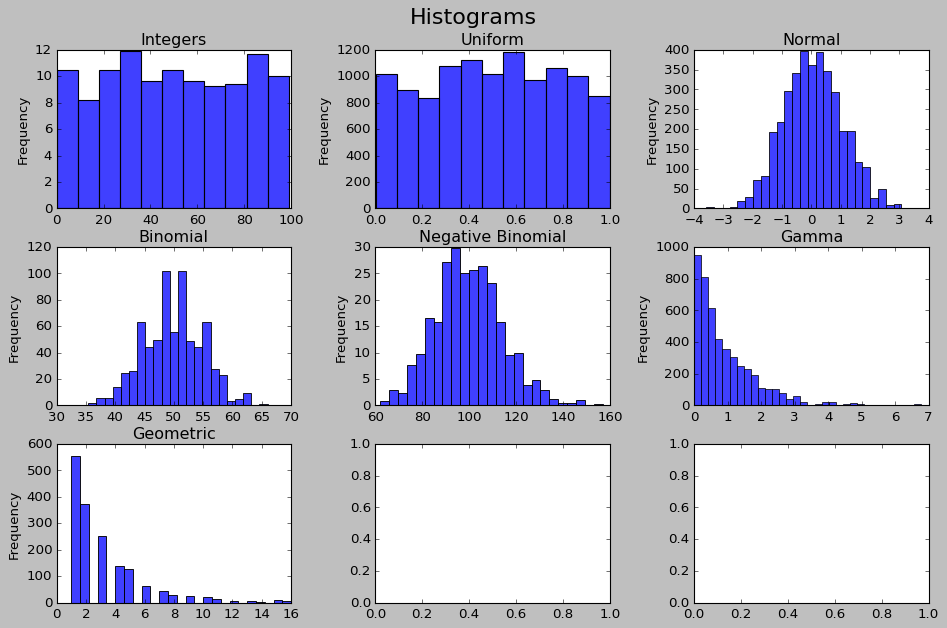

In [67]:
# a)
plt.style.use("classic")

samples = [integers, uniform, normal, binomial, negative_binomial, gamma, geometric]
titles = ['Integers', 'Uniform', 'Normal', 'Binomial', 'Negative Binomial', 'Gamma', 'Geometric']

fig1, axes1 = plt.subplots(3,3, figsize=(12,8))
fig1.suptitle('Histograms', fontsize=20)
axes1 = axes1.flatten()

for data, ax in zip(samples, axes1):
    sns.histplot(data, ax=ax, stat='frequency', element='bars')
    plt.tight_layout()

for title, ax in zip(titles, axes1):
    ax.set_title(title)

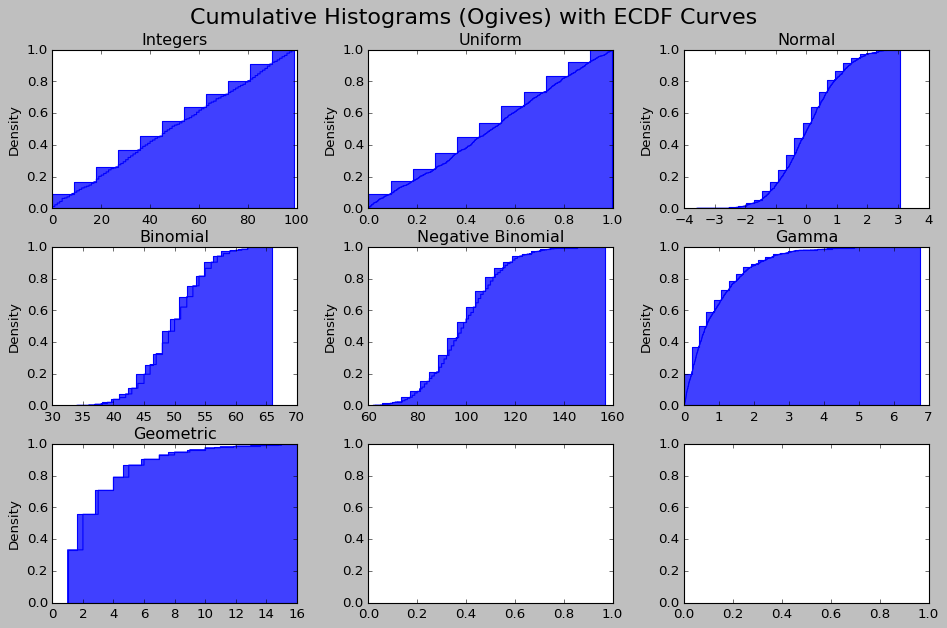

In [68]:
# b)
fig2, axes2 = plt.subplots(3,3, figsize=(12, 8))
fig2.suptitle('Cumulative Histograms (Ogives) with ECDF Curves', fontsize=20)
axes2 = axes2.flatten()

for data, ax in zip(samples, axes2):
    sns.histplot(data, ax=ax, cumulative=True, stat='density', element='step')
    plt.tight_layout()

for data, ax in zip(samples, axes2):
    sns.ecdfplot(data, ax=ax)

for title, ax in zip(titles, axes2):
    ax.set_title(title)

#### Exercise 2 (*/**)
Write a quiz application (ie, not a notebook) that displays a histogram or ogive of a distribution with random parameters and asks the user to identify the distribution. Keep track of score. Matplotlib isn't tied to jupyter and works with a GUI as well. Keep it simple or gamify this important exercise all the way with `pygame` or equivalent. 

This will be your own quiz application for the exam -- you will be given a histogram and ogive and be required to identify the distribution as an exam question.